# Using VICTOR to solve volcano science problems
This notebook is intended to:

1. Introduce methods in ordinary least squares regression

2. Introduce the statsmodels API, a powerful way to explore data

3. Introduce the bootstrap, a machine learning technique to quantify model parameters and their uncertainties

## Notebook V3c: Ordinary Least Square (OLS) regression and the bootstrap
#### version 0, Nov 11, 2022

### Background

When we calcuate a correlation coefficient we are searching for a linear correlation between two random variables. Hisashi Kuno developed many of the first petrological tools to understand the origin of volcanic rocks and ultimately their relationship to subduction zones. One of his early plots, developed in the late 1950s and early 1960s, was to show the relationship between potassium (and other alkalis) in erupted lavas and depth to the Benioff zone. Now we are well aware that the depth to the Benioff zone maps earthquakes associated with subducted ocean lithosphere. Kuno was the first scientist to draw a link between geophysical observations of the Benioff zone and petrologic variations in rocks erupted at the surface. In this example, we consider the relationship between depth to the Benioff zone and K$_2$O from a quantitative perspective. We will develop a statistical model of the relationship and consider our confidence in the model parameters.

### Ordinary least squares
Four things are needed for this ordinary least squares problem:

1. The observed data (e.g., $x_i, y_i$ where $i = 1...n$}, where $n$ is the number of K$_2$O ($y_i$) observations, each at horizontal position $x_i$ from the ocean trench.

2. The linear model (linear in $p_j$) where $j=1...m$ and $m$ is the number of unknown model parameters
$$y_{K_2O \textrm{, model}}(x) = p_1f_1(x) + p_2f_2(x) +  ... + p_mf_m(x) = \sum_{j=1}^{m} p_j f_j(x)$$

3. The $m$ chosen basis functions (a set of linear equations), that describe how the model parameters are thought to relate mathematically to the observations: $f_j(x)$ for $j = 1 ... m$

4. The least-squares misfit criterion (what is the error between the model and the observations that we wish to minimize?)
$$E = \sum_{i=1}^{n} e_i^2 = \sum_{i=1}^{n} y_{K_2O \textrm{, model}}(x_i) - K_2O_{obs,i}(x_i))^2$$

Minimizing the misfit with respect to the unknown model parameters ($p_j$) means we must solve the $m$ linear equations that result from setting:
$$\frac{\partial E}{\partial p_j} = 0 \text{   for all   } j = 1 ...m$$
The K$_2$O observations are arranged in a column vector:
$$\mathbf b = 
\begin{bmatrix}
    y_{1}       & y_{2} & y_{3} & \dots & y_{n} 
\end{bmatrix}^T $$

where $T$ indicates the transpose of the matrix</p>

<p>The matrix of basis functions is:
$$\mathbf A = 
\begin{bmatrix}
    f_{11} & f_{12} & f_{13} & \dots  & f_{1m} \\
    f_{21} & f_{22} & f_{23} & \dots  & f_{2m} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    f_{n1} & f_{n2} & f_{n3} & \dots  & f_{nm}
\end{bmatrix} $$
The matrix of unknown model parameters is:
$$\mathbf x = 
\begin{bmatrix}
    p_1 \\
    p_2\\
    \vdots \\
    p_m
\end{bmatrix} $$
So, the predicted solution is:
$$\mathbf y_{K_2O} = \mathbf A \mathbf x$$
Knowing $\mathbf A$ and $\mathbf b$, we need to find the best $\mathbf x$, minimizing the difference between $\mathbf y_{K_2O}$ and $\mathbf b$.</p>

The least-square solution is:
$$\mathbf x = (\mathbf A^T \mathbf A)^{-1}  \mathbf A^T  \mathbf b $$

That is a lot of code to write! Fortunately for us, others have written the OLS solution in the statsmodel package, implemented in the following.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.formula.api import ols

In [2]:
# Here are the data. These lists are converted to a pandas dataframe
#depth to the benioff zone (km) at the eruption location
dbz = [81.92,90.45,91.31,92.16,94.72,101.55,101.55,107.52,110.93,115.2,116.05,121.17,122.03,122.03,131.41,131.41,135.68,136.53,136.53,140.8,142.51,148.48,151.89,151.89,151.89,162.99,183.47,188.59,212.48,212.48,243.2,244.91,262.83,271.36,280.75]
#K2O concentration measured in the whole rock
K2O = [1.077, 0.704,1.003,1.291,0.8,0.779,0.843,1.9,1.205,1.397,2.005,0.704,0.896,1.205,1.003,1.301,1.707,1.291,1.6,1.707,1.44,2.101,2.283,1.846,1.792,2.507,2.507,2.091,1.952,2.091,2.507,3.893,2.645,2.699,2.496]

subduction_dict = {'dbz': dbz, 'K2O': K2O} # a shortcut to building the dataframe from lists using a dictionary
subduct = pd.DataFrame(subduction_dict) # the dataframe is called "subduct"
subduct.head() # print out the first bit of the dataframe

,dbz,K2O
0,81.92,1.077
1,90.45,0.704
2,91.31,1.003
3,92.16,1.291
4,94.72,0.800


In [3]:
# fit a linear model using the ols routine
# dependent variable ~ list of independent variables separated by the + symbol, in 
# this case there is only one independent variable, but there might be many in a linear
# regression model
res = ols('K2O ~ dbz', data=subduct).fit()

# this model has two parameters, the estimated intercept and the estimated slope
# these parameters are stored in a list called "params" for model parameters
# these parameters are m and b in the linear equation y = mx + b
res.params

Intercept    0.086146
dbz          0.010632
dtype: float64

In [4]:
#print out lots of statistics about the linear regression model
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    K2O   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     65.47
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           2.44e-09
Time:                        18:51:10   Log-Likelihood:                -18.752
No. Observations:                  35   AIC:                             41.50
Df Residuals:                      33   BIC:                             44.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0861      0.211      0.408      0.686      -0.344       0.516
dbz            0.0106      0.001      8.092      0.000       0.008       0.013
==============================================================================
Omnibus:                        5.559   Durbin-Watson:                   1.773
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                4.324
Skew:                           0.839   Prob(JB):                        0.115
Kurtosis:                       3.386   Cond. No.                         472.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretation of output
Perhaps the most important output is the R-squared value. In words, 66.5 percent of variation in the value of K$_2$O is explained by the independent variable depth to the Benioff zone. note tht an important difference between the correlation coefficient, R, and R-squared, is that R-squared is always positive.

Prob (F-statistic) indicates the probability that the linear regression is statistically significant. In this case there is only a probability of 2.44e-09 that the linear regression is not significant. Kuno was right, the linear model works to explain variation in K$_2$O across the volcanic arc!

The line: "coef	std err	t	P>|t|	[0.025	0.975]" indicates the value of the coefficient (the intercept and slope), its standard error, and the 95% confidence interval on these estimates. In this case, we cannot say with 95% confidence that the intercept is not zero.

### The bootstrap: A better way to estimate uncertainty in model parameters

There are some major assumptions in parameter uncertainty quantification using the standard error and the 95 percent confidence interval, which is calculated assuming random error. Bradley Efron noticed these problems, and in the 1960s and 1970s developed a method for improved uncertainty quantification using compute horespower. He called his method "the bootstrap". In many ways, the bootstrap method is one of the first machine learning techniques that gained widespread use.

In bootstrap, a subset of the data is chosen to represent the entire data set. Say a data set consists of 10 observations. The regression is made and a linear model fit with only 9 of these observations, randomly selected. The intercept and slope are estimated using OLS. Then, a new set of 9 observations are chosen and the model parameters re-calculated. This procedure is repeated a bunch of times, like 1000 times. One can then plot a histogram of the parameter uncertainty and estimate the 95% confidence inteval directly from the range of observations.

In bootstrap with replacement, probably the most common method, a random sample is selected from the ten observations. Then another random sample is drawn from the 10, which might be the same sample already drawn! Samples have some chance of appeaing twice, three times, or more in the subset of observations.

Here is a bootstrap estimate of the regression model parameters for the subduction data:

In [5]:
param1 = []
param2 = []

ntrials = 2000
for trial in range(ntrials):
    boot_sample = subduct.sample(frac=1, replace=True)

    res = ols('K2O ~ dbz', data=boot_sample).fit()

    param1.append(res.params['Intercept'])
    param2.append(res.params['dbz'])

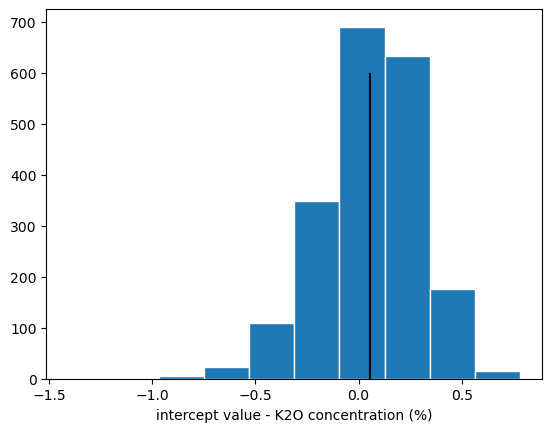

In [6]:
plt.hist(param1, edgecolor='white')
plt.xlabel("intercept value - K2O concentration (%)")
plt.vlines(np.mean(param1), 0, 600, "k")
plt.show()

In [7]:
# the confidence interval is determined directly from this "empirical" distribution
print("confidence interval in intercept: ", np.percentile(param1, 2.5), np.percentile(param1, 97.5))
print ("mean: ", np.mean(param1))

confidence interval in intercept:  -0.4698040817131583 0.4666134571399309
mean:  0.05497366200503604


### A problem with the intercept mearuements of K$_2$O
But wait! There is a major problem with the estimate of the intercept, the K$_2$O concentration in whole rock analyses expected at the trench, using any of the above methods. Of course, K$_2$O concentration in a rock cannot possibly be negative. Yet, the methods tried so far indicate there is about a 50 percent chance that the value of the intercept is a negative number. This makes perfect sense from mathematical perspective, but makes no sense from a geologic perspective. One should not publish an uncertinaty estimate on a major element concentration that includes negative numbers, since we are all certain concentrations cannot be less than zero.

The bootstrap solves this problem in uncertainty quantification. Check out the conditional statement used to assure that all trials produce intercept values greater than 0.

In [8]:
param1 = []
param2 = []

ct = 0
ntrials = 2000
for trial in range(ntrials*10):
    boot_sample = subduct.sample(frac=1, replace=True)

    res = ols('K2O ~ dbz', data=boot_sample).fit()

    if (res.params['Intercept'] > 0):
        param1.append(res.params['Intercept'])
        param2.append(res.params['dbz'])
        ct = ct + 1
    if (ct == ntrials): break

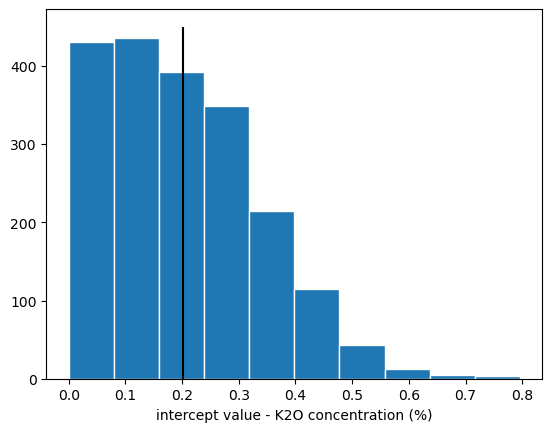

In [9]:
plt.hist(param1, edgecolor='white')
plt.xlabel("intercept value - K2O concentration (%)")
plt.vlines(np.mean(param1), 0, 450, "k")
plt.show()

In [10]:
print("confidence interval in intercept: ", np.percentile(param1, 2.5), np.percentile(param1, 97.5))
print ("mean: ", np.mean(param1))

confidence interval in intercept:  0.009294608742204303 0.49339785085098486
mean:  0.20161324940618436


### Now plot the best model

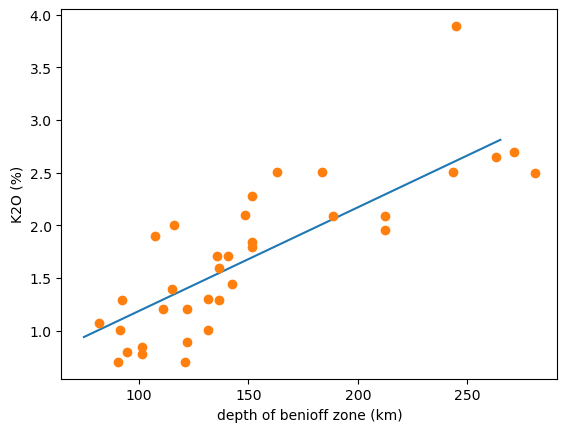

In [11]:
x = np.arange(75,275,10)
y = np.mean(param2)*x + np.mean(param1)

plt.plot(x,y)
plt.plot(dbz, K2O, "o")
plt.xlabel("depth of benioff zone (km)")
plt.ylabel("K2O (%)")

plt.show()

### More Applications

Bootstrap is used heavily in volcanic hazard assessment. Consider the following applications.

1. Isotopic age determinations are often used in volcanic hazard assessment to forecast recurrence rate. Suppose an excellent lab reports the age of a lava dome sample to be $4.5 \pm 5.7$ ka, with 95 percent confidence. The age determination accurately reflects the analytical uncertainty in the age of the rock, but you are sure the sample is not from an eruption that occurred in historic times (say within the last 500 yr). How can you use this age in a hazard assessment to estimate recurrence rate? Hint: the lab error is likely to be a normal distribution.

2. Similarly, earthquake hypocenter location is uncertain and sometimes results in a negative depth for the hypocenter. The negative depth reflects the analytical uncertainty associated with earthquake location, but is not physically realistic. How can bootstrap be used to relocate these earthquakes with uncertainty for use in eruption forecasting?

3. The following eruption data were collected for Cerro Negro volcano (Nicaragua). If one is to use these data to forecast future eruption hazards it is important to determine if there is a correlation between eruption column height (dependent variable) and volume  (independent variable), realizing that eruption column height cannot be negative. Use a linear models to estimate relationship between column height and volume, using bootstrap to indicate the uncertainty in model parameters.

In [12]:
# year of the Cerro Negro eruption
year = [1867, 1923, 1947, 1950, 1957, 1960, 1968, 1971, 1992, 1995, 1999]

#volume of the eruption (note scientific noteation for the volume numbers) (m3)
volume_tephra = [7.4e6, 1.7e7, 2.3e7, 2.8e6, 2.8e6, 1.1e6, 9.7e6, 3e7, 2.3e7, 2.8e6, 8.4e5]

# maximum eruption column height (km)
column_height = [3,2,6,1.5,2,1,2,6,8,2.5,1]

#eruption duration (days)
duration = [16, 49, 13, 26, 20, 89, 48, 10.6, 3.6, 1.3, 1]

#build the dataframe from these lists of data
eruption_data = pd.DataFrame(list(zip(volume_tephra, column_height, duration)),
               columns =['volume', 'col_ht', 'duration'],
               index = year)

#print the dataframe
eruption_data

,volume,col_ht,duration
1867,7400000.0,3.0,16.0
1923,17000000.0,2.0,49.0
1947,23000000.0,6.0,13.0
1950,2800000.0,1.5,26.0
1957,2800000.0,2.0,20.0
1960,1100000.0,1.0,89.0
1968,9700000.0,2.0,48.0
1971,30000000.0,6.0,10.6
1992,23000000.0,8.0,3.6
1995,2800000.0,2.5,1.3
